### Importing Libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Problem 1

<img src = "1.jpg">

#### Problem 1.2

In [65]:
final_t = 10
dt = 0.01
x_n = 2 # value for x_0
num_sim = 10_000 #Total number of Monte-Carlo Simulations

T = list(np.arange(dt, final_t, dt)) #list or time steps to observe value on, we start with dt, since we are prefilling with x_0 already.

sim_mat = np.empty((num_sim,len(T)+1),dtype = 'float32') # Matrix to store each of 10K simulated processes

sim_mat[:, 0] = x_n #Settign initial x_0 for every simulation i.e value at t = 0
sim_mat[:,0], sim_mat.shape

(array([2., 2., 2., ..., 2., 2., 2.], dtype=float32), (10000, 1000))

In [20]:
# # Simulating each individual processes for dt time steps till final_t
# %time
# for sim in sim_mat:
#     for i in range(1,len(T)+1):
#         # x_n+1 = x_n - x_n*dt + np.sqrt(2*dt)*np.random.randn()
#         x_n_1 = x_n - x_n * dt + np.sqrt(2*dt)*np.random.randn()

#         # Changing x_n t0 x_n+1 for next iteration
#         x_n = x_n_1

#         sim[i] = x_n # Storing the next value of the process in the current simulation

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs


In [66]:
# Simulating each individual process for dt time steps till final_t
for i in range(1,len(T)+1):
    # Getting the new x_n+1 for all simulations at time n, by utilizing the values of x at time n-1 basically following the equation
    # x_n+1 = x_n - x_n*dt + np.sqrt(2*dt)*np.random.randn()
    x_n_1 = sim_mat[:, i-1] - sim_mat[:, i-1] * dt + np.sqrt(2*dt) * np.random.randn(num_sim)
    
    # Setting the columns at nth time step with the obtained value
    sim_mat[:, i] = x_n_1

In [102]:
# Time points to plot histograms at
def hist_plt(time_points, sim_mat):
    num_plots = len(time_points)
    num_rows = int(np.ceil(np.sqrt(num_plots)))
    num_cols = int(np.ceil(num_plots / num_rows))
    
    # Get a colormap
    cmap = plt.get_cmap('tab10')
    
    # Get the corresponding colors from the colormap
    colors = [cmap(i) for i in range(len(time_points))]
    
    # Iterate over the time points and plot histograms
    fig, axs = plt.subplots(num_rows, num_cols, figsize = (20,18))
    axs = axs.ravel()
    for i, t in enumerate(time_points):
        # Get the corresponding index in T
        t_index = int(t / dt)
        # Extract the values at the given time point
        if t_index>0:
            values = sim_mat[:, t_index-1] #doing this since t = 10, will be stored in 999th collumns and likewise for other t values.
            #print(len(values))
        else: 
            values = sim_mat[:,t_index]
            #print(len(values))
    
        # Plot histogram with the random color
        axs[i].hist(values, bins=120, density=True, alpha=0.7, label=f't = {t}', color=colors[i])
    
        # Add labels and legend
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
        #axs[i].set_ylim([0, 2])
        #axs[i].set_xlim([-6,6])
        axs[i].legend()
    
    # Show the plot
    samples = np.random.randn(10000)
    i = len(time_points)
    axs[i].hist(samples, bins=120, density=True, alpha=0.7, label = 'Normal Distribution', color = cmap(i))
    axs[i].set_ylabel('Frequency')
    axs[i].legend()
    plt.show()
    # Show the plot
    
    fig.tight_layout()
    plt.show()

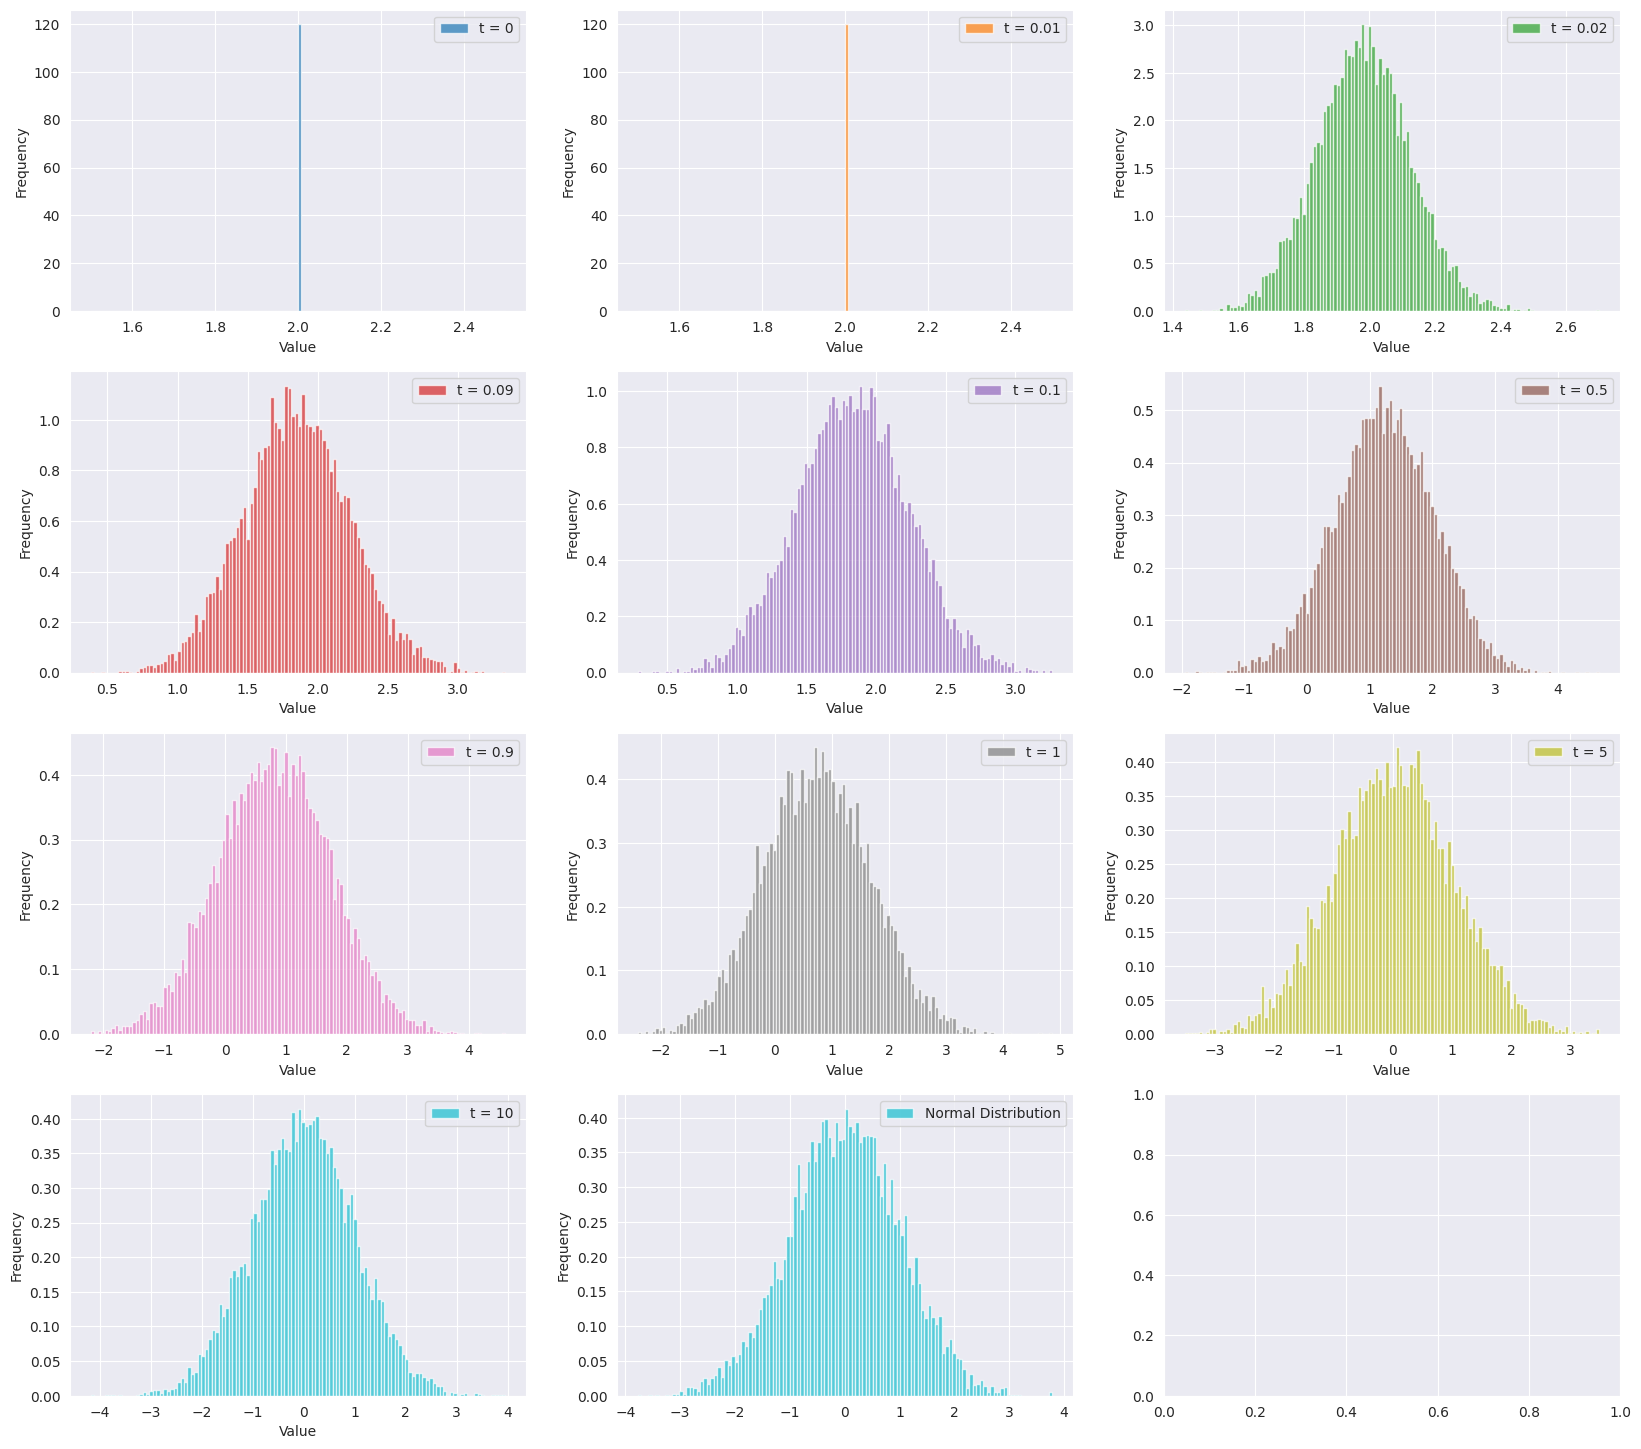

In [103]:
time_points = [0,0.01,0.02,0.09,0.1,0.5,0.9,1,5,10]
hist_plt(time_points, sim_mat)

#### Problem 1.3

- The distribution looks like normal distribution 
- Distribution over time converge to a normal distribution with mean as 0 and variance 1, since it's most of the support is seen to be inside the values of -2.75 and 2.75

#### Problem 1.4

- The Ornstein-Uhlenbeck process is a stochastic process that describes the evolution of a particle undergoing Brownian motion with a mean-reverting behavior.
- In the equation $x_{n+1} = x_n - x_n*∆t + \sqrt{2∆t}*\xi_n$, the term $x_n - x_n*∆t$ represents the mean-reverting component, while the term $\sqrt{2∆t}$ $\xi_n$ represents the random fluctuation or noise.
- If we could run this process reverse-in-time, it would allow us to generate samples from a distribution that converges to the distribution observed in step 3.
- Specifically, starting from the distribution at time t = 10, we could simulate the process backward to obtain samples from the distribution at earlier times, such as t = 1, t = 0.5, and t = 0 . This reverse simulation can be useful in various scenarios.
- For example, if we have observed the final distribution at a particular time and want to understand how the system evolved over time to reach that distribution, we can use the reverse-in-time simulation to trace back the possible paths and distributions at earlier times.
- In summary, running the Ornstein-Uhlenbeck process reverse-in-time allows we to obtain samples from the distributions observed at earlier times, providing insights into the dynamics and evolution of the system.

In [104]:
final_t = 10
dt = 0.01
num_sim = 10_000 # Total number of Monte-Carlo Simulations

T = list(np.arange(dt, final_t, dt)) # List of time steps to observe value on, we start with dt since we are prefilling with x_0 already.

sim_mat_rev = np.empty((num_sim, len(T) + 1), dtype='float32') # Matrix to store each of the 10K simulated processes

sim_mat_rev[:, -1] = sim_mat[:,-1] # Setting the final x_N for every simulation i.e., value at t = final_t
sim_mat_rev[:, -1], sim_mat_rev.shape

(array([-0.5303501 , -0.9190791 ,  0.18526709, ...,  0.38364205,
        -0.35819176,  1.5971665 ], dtype=float32),
 (10000, 1000))

In [105]:
# Simulating each individual process in reverse time for dt time steps till final_t
for i in range(len(T), 0, -1):
    # Getting the new x_n-1 for all simulations at time n, by utilizing the values of x at time n
    # x_n-1 = (x_n - np.sqrt(2*dt)*np.random.randn()) / (1 - dt)
    x_n_1 = (sim_mat_rev[:, i] - np.sqrt(2 * dt) * np.random.randn(num_sim)) / (1 - dt)

    # Setting the columns at nth time step with the obtained value
    sim_mat_rev[:, i - 1] = x_n_1

In [106]:
sim_mat_rev[:, 0], sim_mat_rev.shape

(array([-38979.703 , -29316.773 ,  -4029.5823, ...,  -8009.154 ,
          5539.132 ,  44781.805 ], dtype=float32),
 (10000, 1000))

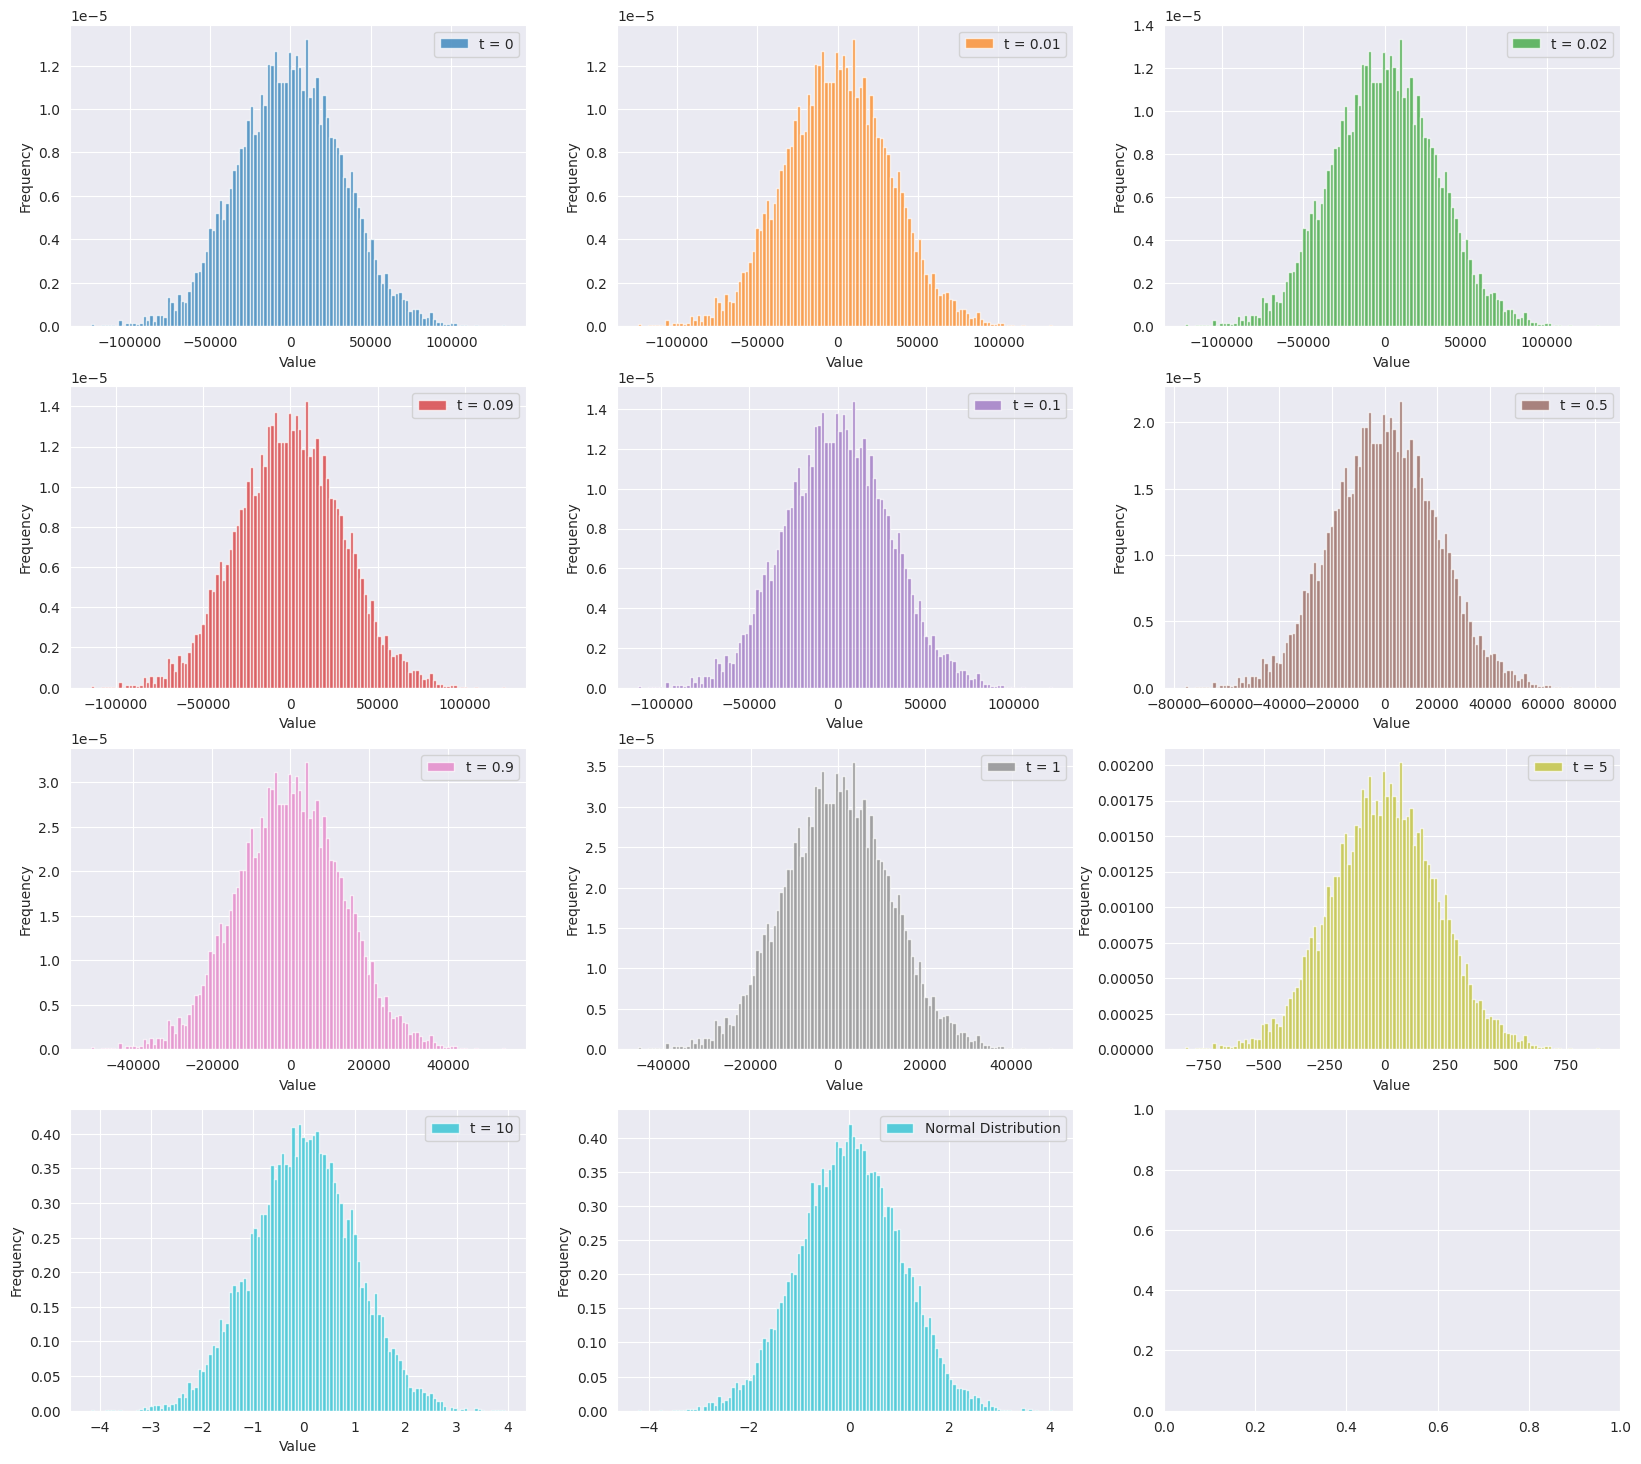

In [107]:
hist_plt(time_points,sim_mat_rev)